# Data Loading

First let's load the data:

In [1]:
import pandas as pd
import seaborn as sns

# import plotlog, vrh, vels, hertzmindlin, 
# softsand, stiffsand, rpt, twolayer (+ 2 appendix)
from packages.functions import *

%matplotlib inline

In [2]:
import os
path = input("Enter folder location containing file:  ")  #r"C:\Users\tkngu\Dropbox\Work\FORCE"
infile = input("Enter file name including extension:  ") #"train.csv"
infile_path = os.path.join(path, infile)

Enter folder location containing file:  C:\Users\tkngu\Dropbox\Work\RockPhysics\QSI\Quantitative_Seismic_Interpretation
Enter file name including extension:  train.csv


In [3]:
data = pd.read_csv(infile_path, sep=';')
all_columns = data.columns

In [4]:
all_columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [5]:
data = data.drop(['X_LOC', 'Y_LOC', 'Z_LOC', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1)

In [6]:
wells = data.WELL.unique(); print(f"Number of wells: {len(wells)}"); print(wells)

Number of wells: 98
['15/9-13' '15/9-15' '15/9-17' '16/1-2' '16/1-6 A' '16/10-1' '16/10-2'
 '16/10-3' '16/10-5' '16/11-1 ST3' '16/2-11 A' '16/2-16' '16/2-6' '16/4-1'
 '16/5-3' '16/7-4' '16/7-5' '16/8-1' '17/11-1' '25/11-15' '25/11-19 S'
 '25/11-5' '25/2-13 T4' '25/2-14' '25/2-7' '25/3-1' '25/4-5' '25/5-1'
 '25/5-4' '25/6-1' '25/6-2' '25/6-3' '25/7-2' '25/8-5 S' '25/8-7' '25/9-1'
 '26/4-1' '29/6-1' '30/3-3' '30/3-5 S' '30/6-5' '31/2-1' '31/2-19 S'
 '31/2-7' '31/2-8' '31/2-9' '31/3-1' '31/3-2' '31/3-3' '31/3-4' '31/4-10'
 '31/4-5' '31/5-4 S' '31/6-5' '31/6-8' '32/2-1' '33/5-2' '33/6-3 S'
 '33/9-1' '33/9-17' '34/10-19' '34/10-21' '34/10-33' '34/10-35' '34/11-1'
 '34/11-2 S' '34/12-1' '34/2-4' '34/3-1 A' '34/4-10 R' '34/5-1 A'
 '34/5-1 S' '34/7-13' '34/7-20' '34/7-21' '34/8-1' '34/8-3' '34/8-7 R'
 '35/11-1' '35/11-10' '35/11-11' '35/11-12' '35/11-13' '35/11-15 S'
 '35/11-6' '35/11-7' '35/12-1' '35/3-7 S' '35/4-1' '35/8-4' '35/8-6 S'
 '35/9-10 S' '35/9-2' '35/9-5' '35/9-6 S' '36/7-3' '7/1-1

In [7]:
data_columns = data.columns
input_columns = ['GR', 'DTC', 'DTS', 'RHOB', 'NPHI', 'RSHA', 'RDEP']
rock_physics_curves = ['GR', 'VSH', 'VP', 'VS', 'RHOB', 'NPHI', 'IP', 'IS', 'VPVS', 'PHIE']

# Find wells with Shear wave coverage

In [8]:
# Find wells that have DTS (full, partial, none)

wells_full_shear = []
wells_no_shear = []
wells_partial_shear = []

for well in wells:
    if data[data.WELL==well].DTS.notna().all():
        wells_full_shear.append(well)
    elif data[data.WELL==well].DTS.isna().all():
        wells_no_shear.append(well)
    else:
        wells_partial_shear.append(well)        


In [9]:
print(wells_full_shear)

['16/5-3', '25/6-3', '35/11-10', '35/3-7 S', '35/9-5']


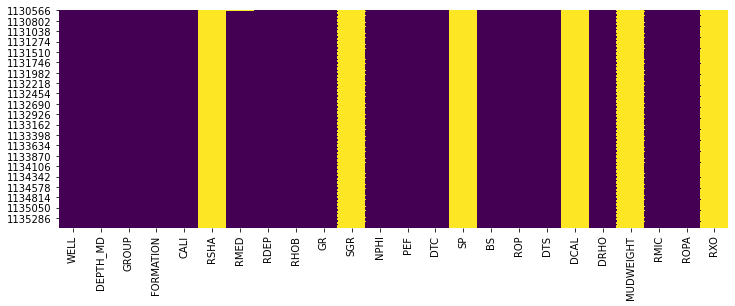

In [10]:
# Shows log coverage of a specified well
plt.figure(figsize=(12,4))
sns.heatmap(data[data.WELL==wells_full_shear[-1]].isnull(), cbar=False, cmap='viridis');

# Select well for analysis

In [11]:
# Take a specific well
df = data[data.WELL==wells_full_shear[-1]]
df = df.set_index('DEPTH_MD')
# Basic rock physics log curves from which all others are derived
df = df[input_columns]

(3477.1995872, 2726.1675871999996)

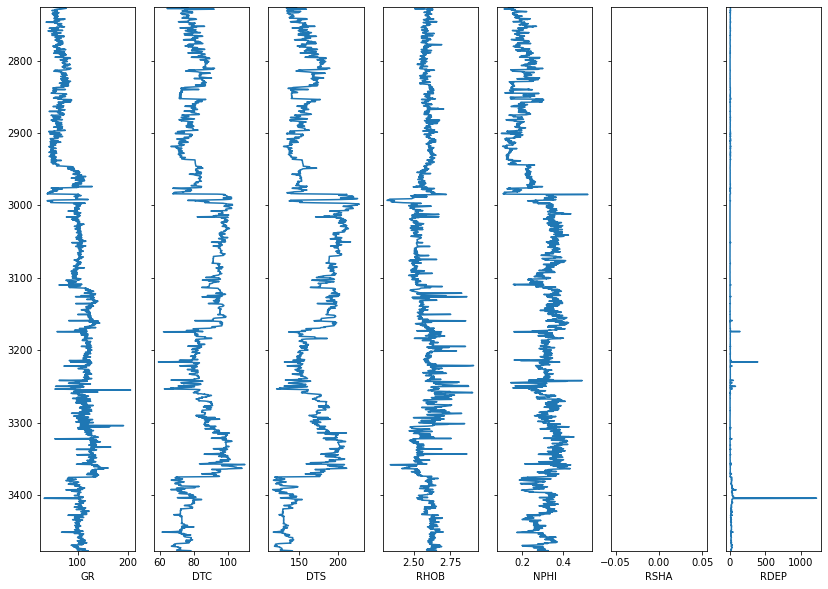

In [12]:
# Plot logs from unfiltered
fig, axs = plt.subplots(1, len(df.columns), figsize=(14, 10), sharey=True)
for ic, col in enumerate(df.columns):
    axs[ic].plot(df[col], df.index)
    axs[ic].set_xlabel(col)
axs[0].set_ylim(df.index.values[-1], df.index.values[0])